# Bootstrapping statistics in Python

I created this notebook to help me understand how boostrapping, performed on a limited size sample, can improve a test statistic with respect to the total population. 

This exercise will randomly generate a large population, then randomly draw four small samples. Bootstrapping methods will be applied to each of the samples to better understand how bootstrapping can improve statistical analysis of small sample sizes.

In [176]:
# import modules and set plot style
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

### 1. Generate normally distributed "population" and draw four small random samples from population:

In [177]:
population = np.random.normal(100, 20, 5000000)
sample1 = np.random.choice(population, 50)
sample2 = np.random.choice(population, 50)
sample3 = np.random.choice(population, 50)
sample4 = np.random.choice(population, 50)

Plot the distributions:

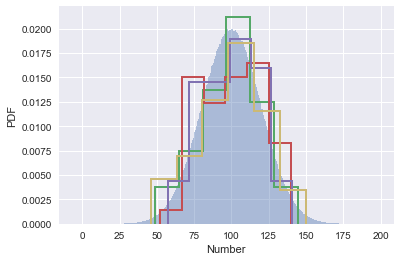

In [178]:
_ = plt.hist(population, bins=500, alpha=0.4, normed=True)
_ = plt.hist(sample1, bins=6, histtype='step', normed=True, linewidth=2)
_ = plt.hist(sample2, bins=6, histtype='step', normed=True, linewidth=2)
_ = plt.hist(sample3, bins=6, histtype='step', normed=True, linewidth=2)
_ = plt.hist(sample4, bins=6, histtype='step', normed=True, linewidth=2)
_ = plt.xlabel('Number')
_ = plt.ylabel('PDF')

plt.show()

Calculate the means:

In [179]:
print('Population:', np.mean(population), np.std(population))
print('Sample 1:', np.mean(sample1), np.std(sample1))
print('Sample 2:', np.mean(sample2), np.std(sample2))
print('Sample 3:', np.mean(sample3), np.std(sample3))
print('Sample 4:', np.mean(sample4), np.std(sample4))

Population: 100.01630952 20.0076363131
Sample 1: 99.9902961363 20.4060845608
Sample 2: 100.067747603 19.7602026516
Sample 3: 99.1083385042 18.9560627673
Sample 4: 99.1939142455 22.5027891262


Clearly small-sized, randomly drawn samples do not reflect the population very well.

A function to generate experimental cumulative distribution functions:

In [180]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
        
    return x, y

plot ECDFs for population and samples:

In [181]:
px, py = ecdf(population)
s1x, s1y = ecdf(sample1)
s2x, s2y = ecdf(sample2)
s3x, s3y = ecdf(sample3)
s4x, s4y = ecdf(sample4)

Plot the ECDFs:

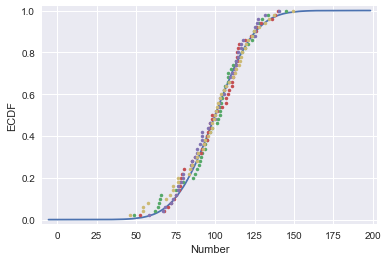

In [182]:
_ = plt.plot(px, py)
_ = plt.plot(s1x, s1y, marker='.', linestyle='none')
_ = plt.plot(s2x, s2y, marker='.', linestyle='none')
_ = plt.plot(s3x, s3y, marker='.', linestyle='none')
_ = plt.plot(s4x, s4y, marker='.', linestyle='none')
_ = plt.xlabel('Number')
_ = plt.ylabel('ECDF')
sns.set_context("notebook", rc={"lines.linewidth": 1})
plt.margins(0.02)
plt.show()

Function to generate bootstrap replicates from a dataset

In [183]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

"Bootstrap" the four samples and compute the test statistic (mean):

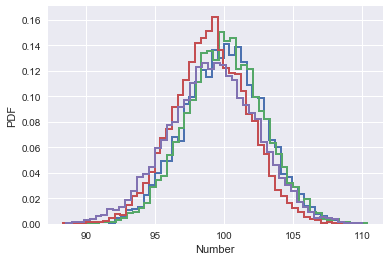

In [184]:
s1_reps = draw_bs_reps(sample1, np.mean, 10000)
s2_reps = draw_bs_reps(sample2, np.mean, 10000)
s3_reps = draw_bs_reps(sample3, np.mean, 10000)
s4_reps = draw_bs_reps(sample4, np.mean, 10000)

# plot the distribution of the replicates
_ = plt.hist(s1_reps, bins=50, histtype='step', linewidth=2, normed=True)
_ = plt.hist(s2_reps, bins=50, histtype='step', linewidth=2, normed=True)
_ = plt.hist(s3_reps, bins=50, histtype='step', linewidth=2, normed=True)
_ = plt.hist(s4_reps, bins=50, histtype='step', linewidth=2, normed=True)
_ = plt.xlabel('Number')
_ = plt.ylabel('PDF')
plt.show()

In [185]:
print('Bootstrapped sample 1:', np.mean(s1_reps))
print('Bootstrapped sample 2:', np.mean(s2_reps))
print('Bootstrapped sample 3:', np.mean(s3_reps))
print('Bootstrapped sample 4:', np.mean(s4_reps))

Bootstrapped sample 1: 99.9932112094
Bootstrapped sample 2: 100.074738827
Bootstrapped sample 3: 99.0715843741
Bootstrapped sample 4: 99.197811627


## Discussion
The bootstrapped sample means are almost identical to the original sample means. Clearly bootstrapping does not infer additional information about the population mean. Looking at the PDF plots, however, we can see a better definition of the probability distribution. This will result in a better estimate of statistical descriptors calculated by brute force methods, e.g. using "np.sum()" or "np.percentile". 

Assuming normal distribution of the non-bootstrapped sample data, we can also calculate confidence intervals using standard statistical tools. The a comparison below shows no significant difference between the two methods applied to one of the samples.

In [186]:
mean, sigma, n = np.mean(sample2), np.std(sample2), len(sample2)
standard = stats.norm.interval(0.95, loc=mean, scale=sigma/np.sqrt(n))
bootstrap = np.percentile(s2_reps, [2.5, 97.5])

print('95% confidence intervals of sample 2, calculated two ways:')
print('Assuming normal distribution:', standard)
print('Bootstrapped:', bootstrap)

95% confidence intervals of sample 2, calculated two ways:
Assuming normal distribution: (94.590599518035106, 105.54489568794835)
Bootstrapped: [  94.6701917   105.58346679]


Finally, I found a good explanation of resampling methods here:
http://userwww.sfsu.edu/efc/classes/biol710/boots/rs-boots.htm

"This method is beneficial to side step problems with non-normality or if the distribution parameters are unknown". Therefore, if I am interested in the mean of a normally distributed sample, bootstrapping is not necessary. Bootstrapping is useful when the test statistic (e.g. mean) is not straightforward to calculate, or when the data doesn't follow a descriptive distribution (e.g. normal distribution).

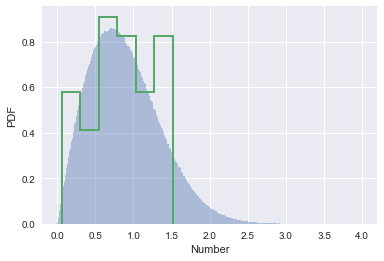

Population: 0.88636628566
Sample 5: 0.830999878004
Bootstrapped sample 5: 0.831715762275
95% confidence intervals of sample 2, calculated two ways:
Assuming normal distribution: (0.72288293028646711, 0.93911682572246657)
Bootstrapped: [ 0.72353674  0.94004073]


In [187]:
# Repeat calculations with non-normal (Weibull) distribution
population2 = np.random.weibull(2., 5000000)
sample5 = np.random.choice(population2, 50)
s5_reps = draw_bs_reps(sample5, np.mean, 10000)

_ = plt.hist(population2, bins=500, alpha=0.4, normed=True)
_ = plt.hist(sample5, bins=6, histtype='step', normed=True, linewidth=2)
_ = plt.xlabel('Number')
_ = plt.ylabel('PDF')

plt.show()

print('Population:', np.mean(population2))
print('Sample 5:', np.mean(sample5))
print('Bootstrapped sample 5:', np.mean(s5_reps))
mean, sigma, n = np.mean(sample5), np.std(sample5), len(sample5)
standard = stats.norm.interval(0.95, loc=mean, scale=sigma/np.sqrt(n))
bootstrap = np.percentile(s5_reps, [2.5, 97.5])

print('95% confidence intervals of sample 2, calculated two ways:')
print('Assuming normal distribution:', standard)
print('Bootstrapped:', bootstrap)


Once again, not much difference in the test statistics. The advantage of bootstrapping is still not clear.

-----------------------------

## Addendum: Additional Functions
Bernoulli trials function

In [188]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success


Function to do pairs bootstrap:

In [189]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[bs_inds], bs_intercept_reps[bs_inds] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

Permutation sample:

In [190]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

Permutation replicates:

In [191]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates